# Gradient Descent 

In [1]:
# Importing Important Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# Generating Dataset
np.random.seed(42)
x,y = make_regression(n_features=1,noise=10)

### Generaing Cost Function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\$$ 

In [3]:
# Generaing Cost Function
def cost_function(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * cost
    return total_cost
    

### Gradient Function

$$\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [4]:
def gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db = dj_db/m
    dj_dw = dj_dw/m

    return dj_dw,dj_db

### Gradient Descent 

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [5]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iter,cost_function,grad_function):
    w = w_in
    b = b_in
    for i in range(num_iter):
        dj_dw, dj_db = grad_function(x,y,w,b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
    return w,b

In [6]:
w_in = 0 
b_in = 0
alpha = 0.01
num_iter = 1000
cost_function = cost_function
grad_function = gradient
w , b = gradient_descent(x,y,w_in,b_in,alpha,num_iter,cost_function,grad_function)

In [7]:
print(w)

[44.42210912]


In [8]:
print(b)

[1.15857049]


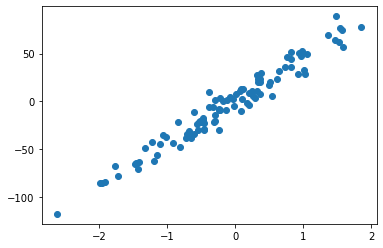

In [9]:
plt.scatter(x,y)

In [10]:
y_ans = w * 2.8 + b

In [11]:
print(y_ans)

[125.54047601]


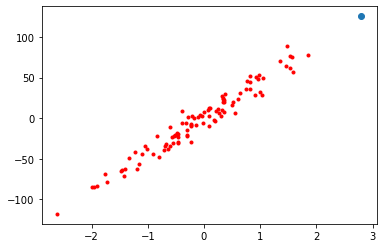

In [12]:
plt.scatter(2.8,y_ans)
plt.plot(x,y,'r.')